In [88]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import matplotlib.pyplot as plt
import swan_vis as swan
import yaml
from snakemake.io import expand
import cerberus
import pyranges as pr
import upsetplot

p = os.path.dirname(os.getcwd())
sys.path.append(p)

from scripts.utils import *
from scripts.vcf_utils import *
from scripts.plotting import *

In [89]:
config = load_config()
od = '../snakemake/gtex/'

In [90]:
df = pd.DataFrame()
ics = [od+config['gtex']['cerb']['ics'],
       od+config['chess']['cerb']['ics']]
sources = ['gtex', 'chess']
for ic, source in zip(ics, sources):
    temp = pd.read_csv(ic, sep='\t')
    
    # remove monoexonic, add source, drop name
    temp = temp.loc[temp.Coordinates != '-']
    temp['source'] = source
    temp = temp.drop('Name', axis=1)
    
    df = pd.concat([df, temp], axis=0)    

In [91]:
temp = df.copy(deep=True)

In [92]:
df = df.pivot_table(
    index=['Strand', 'Coordinates', 'Chromosome'],
    columns='source',
    aggfunc=lambda x: True,
    fill_value=False).reset_index()
# df.columns = ['_'.join(col).strip() if col[1] else col[0] for col in df.columns.values]
df.head()
df.reset_index(drop=True, inplace=True)

In [93]:
df.loc[(df.chess==True)&(df.gtex==True)].Coordinates.tolist()[0]


'100015726-100019230-100019349-100023418-100023932-100024153-100024307-100029860-100029952-100030248-100030375-100033304'

In [94]:
temp.loc[temp.Coordinates=='100015726-100019230-100019349-100023418-100023932-100024153-100024307-100029860-100029952-100030248-100030375-100033304']

,Chromosome,Strand,Coordinates,source
81964,chr7,+,100015726-100019230-100019349-100023418-100023...,gtex
122967,chr7,+,100015726-100019230-100019349-100023418-100023...,chess


In [95]:
df.head()

source,Strand,Coordinates,Chromosome,chess,gtex
0,+,1000064-1000611-1000697-1000881-1000989-100146...,chr4,True,False
1,+,100015726-100019230-100019349-100023418-100023...,chr7,True,False
2,+,100015726-100019230-100019349-100023418-100023...,chr7,True,True
3,+,100015726-100023418-100023461-100023551-100023...,chr7,False,True
4,+,100015726-100023418-100023461-100023551-100023...,chr7,True,True


In [96]:
# df['id'] = df.Strand+'_'+df.Chromosome+'_'+df.Coordinates
# df.drop(['Strand', 'Chromosome', 'Coordinates'], axis=1, inplace=True)
# df = df.groupby(['chess', 'gtex']).count().rename({'id':'n_ics'}, axis=1)

In [100]:
df.set_index(['chess', 'gtex'], inplace=True)

{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

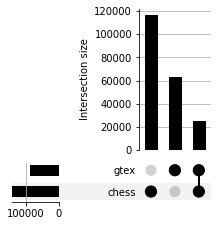

In [101]:
upsetplot.plot(df)


In [99]:
df.head()

source,Strand,Coordinates,Chromosome,chess,gtex
0,+,1000064-1000611-1000697-1000881-1000989-100146...,chr4,True,False
1,+,100015726-100019230-100019349-100023418-100023...,chr7,True,False
2,+,100015726-100019230-100019349-100023418-100023...,chr7,True,True
3,+,100015726-100023418-100023461-100023551-100023...,chr7,False,True
4,+,100015726-100023418-100023461-100023551-100023...,chr7,True,True
